## SOLANA COIN PRICE PREDICTION

In [1]:
import pandas as pd
Solana_data = pd.read_csv("SOLANA_DATA.csv")
Solana_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2021,1.509775,1.859656,1.502038,1.842084,1.842084,25722549
1,02-01-2021,1.845586,1.989295,1.721482,1.799275,1.799275,31671064
2,03-01-2021,1.799902,2.364981,1.799902,2.161752,2.161752,55073422
3,04-01-2021,2.162412,2.485097,1.876342,2.485097,2.485097,59955405
4,05-01-2021,2.490982,2.502616,2.077742,2.157217,2.157217,50555207
...,...,...,...,...,...,...,...
1150,25-02-2024,104.132668,104.329941,102.171028,103.453491,103.453491,909662462
1151,26-02-2024,103.450706,110.580353,100.455200,109.918533,109.918533,2334408023
1152,27-02-2024,109.918785,112.204712,105.896935,108.388084,108.388084,2723995106
1153,28-02-2024,108.399239,118.052200,107.460876,118.052200,118.052200,5029492553


In [2]:
Data = Solana_data.reset_index()["Close"]
Data.head()

0    1.842084
1    1.799275
2    2.161752
3    2.485097
4    2.157217
Name: Close, dtype: float64

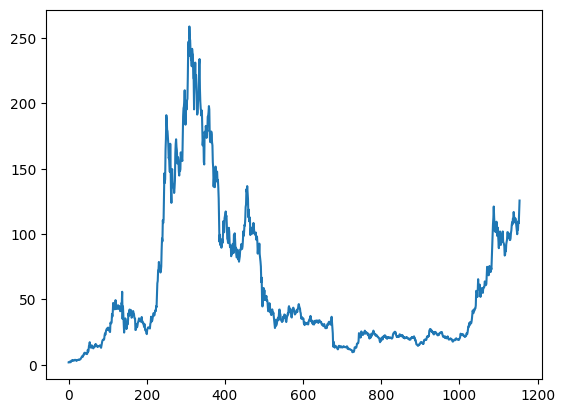

In [3]:
import matplotlib.pyplot as plt
plt.plot(Data)

In [4]:
import numpy as np
Data

0         1.842084
1         1.799275
2         2.161752
3         2.485097
4         2.157217
           ...    
1150    103.453491
1151    109.918533
1152    108.388084
1153    118.052200
1154    125.711517
Name: Close, Length: 1155, dtype: float64

In [5]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
Data = scalar.fit_transform(np.array(Data).reshape(-1,1))
print(Data)

[[1.66484498e-04]
 [0.00000000e+00]
 [1.40967557e-03]
 ...
 [4.14524619e-01]
 [4.52108433e-01]
 [4.81895570e-01]]


In [6]:
training_size = int(len(Data)*0.75)
test_size = len(Data)-training_size
train_data, test_data = Data[0:training_size,:], Data[training_size:len(Data),:1]
training_size, test_size

(866, 289)

In [7]:
train_data

array([[1.66484498e-04],
       [0.00000000e+00],
       [1.40967557e-03],
       [2.66716652e-03],
       [1.39203893e-03],
       [5.05345341e-04],
       [2.23022881e-03],
       [5.52476994e-03],
       [6.16838114e-03],
       [6.48233679e-03],
       [5.08999063e-03],
       [7.05513695e-03],
       [6.66772964e-03],
       [5.75140960e-03],
       [5.64250574e-03],
       [6.40822787e-03],
       [7.85137612e-03],
       [7.76339123e-03],
       [7.16584920e-03],
       [7.48362774e-03],
       [4.63282231e-03],
       [6.01611485e-03],
       [6.63012294e-03],
       [7.13685666e-03],
       [7.39185884e-03],
       [8.74277930e-03],
       [7.35532551e-03],
       [7.86667159e-03],
       [7.91568863e-03],
       [9.43084574e-03],
       [9.58589267e-03],
       [1.09371592e-02],
       [1.34879822e-02],
       [1.52321318e-02],
       [1.79936185e-02],
       [1.89878625e-02],
       [1.67675779e-02],
       [1.90607542e-02],
       [2.36606210e-02],
       [2.34021693e-02],


In [10]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX), numpy.array(dataY) 

In [11]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [12]:
print(X_train.shape), print(Y_train.shape)

(765, 100)
(765,)


(None, None)

In [13]:
print(X_test.shape), print(Y_test.shape)

(188, 100)
(188,)


(None, None)

In [14]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\91636\Desktop\project\my_kernal\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=100,batch_size = 64, verbose = 1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0428 - val_loss: 0.0062
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0089 - val_loss: 0.0022
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/ste

In [19]:
import tensorflow as tf
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [20]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [21]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

88.20413108876588

In [22]:
math.sqrt(mean_squared_error(Y_test, test_predict))

68.9706610930156

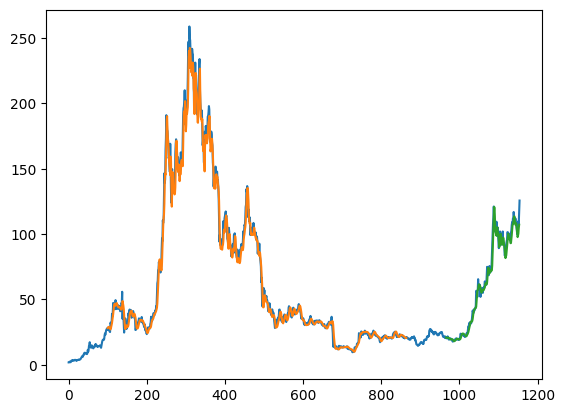

In [23]:
look_back = 100
trainPredictPlot = numpy.empty_like(Data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(Data)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Data)-1,:] = test_predict
plt.plot(scalar.inverse_transform(Data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
len(test_data)

289

In [25]:
x_input = test_data[189:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [27]:
temp_input

[0.2169649092297417,
 0.21311794633552317,
 0.21415658731022247,
 0.22185701162927027,
 0.21717546784393857,
 0.20714930069957677,
 0.2193209163071277,
 0.223426774282904,
 0.2233936905007945,
 0.2255807668943586,
 0.24124903920624965,
 0.23816547670896882,
 0.23228004026568905,
 0.23021192859467457,
 0.23374364080764706,
 0.25682439925313805,
 0.2846875939912214,
 0.2740129427162383,
 0.28353432064771295,
 0.26666102786585877,
 0.25955778778677674,
 0.26821901071744597,
 0.287090599717578,
 0.27444610419915105,
 0.2787415707086935,
 0.26912411874956715,
 0.2821392288521568,
 0.2768603258215466,
 0.31264487547440595,
 0.35800462691490476,
 0.3741396500627214,
 0.41143731898301183,
 0.4304583858542102,
 0.4641420356184736,
 0.43120321235396264,
 0.4092188933044372,
 0.3900879814319831,
 0.4064488314352757,
 0.3890788502420077,
 0.3877594501886871,
 0.41888263222426264,
 0.40761438626272706,
 0.37643705758340984,
 0.40164988241918065,
 0.3818208160193611,
 0.3580159283690967,
 0.34019892

In [28]:
from numpy import array
lst_output = []
n_steps = 100
i = 0
while (i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(1,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape (1, n_steps, 1)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}". format (i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
print(lst_output)

[0.46388498]
101
1 day input [0.21311795 0.21415659 0.22185701 0.21717547 0.2071493  0.21932092
 0.22342677 0.22339369 0.22558077 0.24124904 0.23816548 0.23228004
 0.23021193 0.23374364 0.2568244  0.28468759 0.27401294 0.28353432
 0.26666103 0.25955779 0.26821901 0.2870906  0.2744461  0.27874157
 0.26912412 0.28213923 0.27686033 0.31264488 0.35800463 0.37413965
 0.41143732 0.43045839 0.46414204 0.43120321 0.40921889 0.39008798
 0.40644883 0.38907885 0.38775945 0.41888263 0.40761439 0.37643706
 0.40164988 0.38182082 0.35801593 0.34019893 0.37331032 0.37960563
 0.38980973 0.38155111 0.34970586 0.36529743 0.35908705 0.36047576
 0.37267436 0.38992865 0.35954522 0.35618207 0.35300735 0.3463128
 0.3182123  0.32074675 0.33808201 0.33091536 0.35251162 0.35920401
 0.36610608 0.38799608 0.38763172 0.37034793 0.37352908 0.38361649
 0.37365854 0.36431316 0.36459201 0.369696   0.38571172 0.39273666
 0.40886709 0.41741565 0.41105252 0.4285432  0.43082432 0.44792435
 0.4351804  0.42252754 0.4168422  

10 day output [[0.39959985]]
1 day input [0.23816548 0.23228004 0.23021193 0.23374364 0.2568244  0.28468759
 0.27401294 0.28353432 0.26666103 0.25955779 0.26821901 0.2870906
 0.2744461  0.27874157 0.26912412 0.28213923 0.27686033 0.31264488
 0.35800463 0.37413965 0.41143732 0.43045839 0.46414204 0.43120321
 0.40921889 0.39008798 0.40644883 0.38907885 0.38775945 0.41888263
 0.40761439 0.37643706 0.40164988 0.38182082 0.35801593 0.34019893
 0.37331032 0.37960563 0.38980973 0.38155111 0.34970586 0.36529743
 0.35908705 0.36047576 0.37267436 0.38992865 0.35954522 0.35618207
 0.35300735 0.3463128  0.3182123  0.32074675 0.33808201 0.33091536
 0.35251162 0.35920401 0.36610608 0.38799608 0.38763172 0.37034793
 0.37352908 0.38361649 0.37365854 0.36431316 0.36459201 0.369696
 0.38571172 0.39273666 0.40886709 0.41741565 0.41105252 0.4285432
 0.43082432 0.44792435 0.4351804  0.42252754 0.4168422  0.4292507
 0.42656983 0.4148029  0.40183532 0.38839713 0.38172712 0.3979786
 0.39533395 0.42047655 0.41

18 day output [[0.3391689]]
1 day input [0.26666103 0.25955779 0.26821901 0.2870906  0.2744461  0.27874157
 0.26912412 0.28213923 0.27686033 0.31264488 0.35800463 0.37413965
 0.41143732 0.43045839 0.46414204 0.43120321 0.40921889 0.39008798
 0.40644883 0.38907885 0.38775945 0.41888263 0.40761439 0.37643706
 0.40164988 0.38182082 0.35801593 0.34019893 0.37331032 0.37960563
 0.38980973 0.38155111 0.34970586 0.36529743 0.35908705 0.36047576
 0.37267436 0.38992865 0.35954522 0.35618207 0.35300735 0.3463128
 0.3182123  0.32074675 0.33808201 0.33091536 0.35251162 0.35920401
 0.36610608 0.38799608 0.38763172 0.37034793 0.37352908 0.38361649
 0.37365854 0.36431316 0.36459201 0.369696   0.38571172 0.39273666
 0.40886709 0.41741565 0.41105252 0.4285432  0.43082432 0.44792435
 0.4351804  0.42252754 0.4168422  0.4292507  0.42656983 0.4148029
 0.40183532 0.38839713 0.38172712 0.3979786  0.39533395 0.42047655
 0.41452462 0.45210843 0.48189557 0.46388498 0.47127378 0.46903163
 0.46353203 0.45626378 0

26 day output [[0.2858187]]
1 day input [0.27686033 0.31264488 0.35800463 0.37413965 0.41143732 0.43045839
 0.46414204 0.43120321 0.40921889 0.39008798 0.40644883 0.38907885
 0.38775945 0.41888263 0.40761439 0.37643706 0.40164988 0.38182082
 0.35801593 0.34019893 0.37331032 0.37960563 0.38980973 0.38155111
 0.34970586 0.36529743 0.35908705 0.36047576 0.37267436 0.38992865
 0.35954522 0.35618207 0.35300735 0.3463128  0.3182123  0.32074675
 0.33808201 0.33091536 0.35251162 0.35920401 0.36610608 0.38799608
 0.38763172 0.37034793 0.37352908 0.38361649 0.37365854 0.36431316
 0.36459201 0.369696   0.38571172 0.39273666 0.40886709 0.41741565
 0.41105252 0.4285432  0.43082432 0.44792435 0.4351804  0.42252754
 0.4168422  0.4292507  0.42656983 0.4148029  0.40183532 0.38839713
 0.38172712 0.3979786  0.39533395 0.42047655 0.41452462 0.45210843
 0.48189557 0.46388498 0.47127378 0.46903163 0.46353203 0.45626378
 0.44771636 0.4383308  0.42852831 0.41865298 0.40895531 0.39959985
 0.39067841 0.3822253 

In [29]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
print(day_pred)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130]


In [30]:
import matplotlib.pyplot as plt
len(Data)

1155

In [31]:
df3 = Data.tolist()
df3.extend(lst_output)

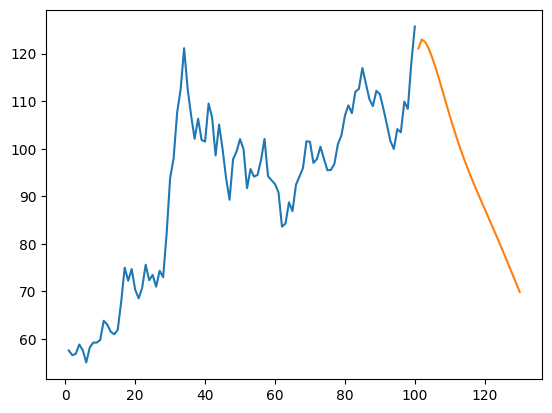

In [34]:
plt.plot(day_new,scalar.inverse_transform(Data[1055:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

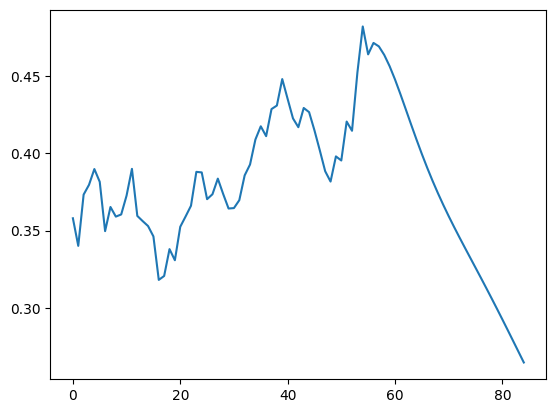

In [35]:
df3=Data.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])

In [36]:
df3=scalar.inverse_transform(df3).tolist()

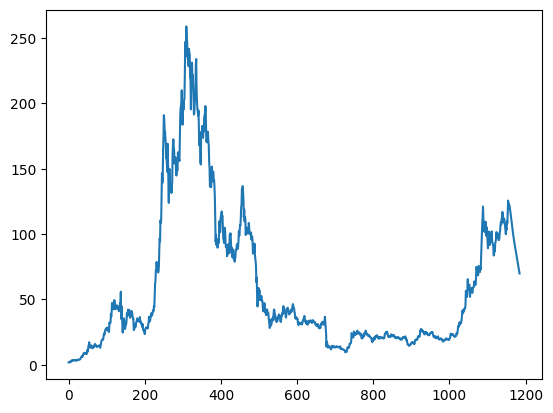

In [37]:
plt.plot(df3)